# Week 10 Assignment

For this week's assignment, you're just going to continue flexing that data vis muscle and practice making specific plots as well as determining the best plot for the question at hand. 

Total Points: 100

### 1. (20 pts) Data Visualization Best Practices
(Bonus: I noted who attended the live class, so if you were there you don't need to answer and automatically get the points since we convered this in depth!)

How would you improve the visualization below to follow better visualization best practices? (name at least 3 changes you would make)

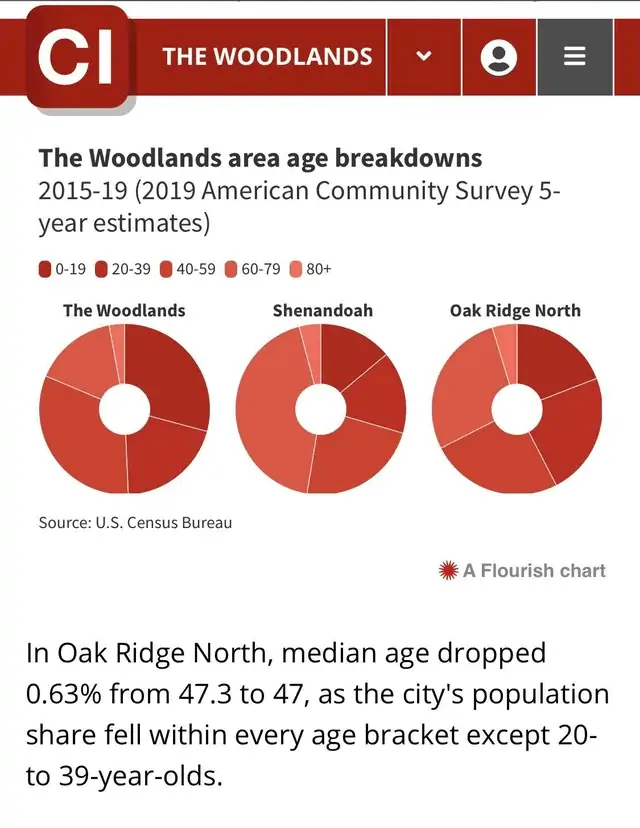

### 2. (20 pts) Modifying Data & Plotting with Dates
Using the weather data set (2021weatherbyMTcity.csv), find the maximum and minimum average temperatures for each day in January (city doesn't matter) and plot the max/min avg. temp lines by day for the month. Make sure the plot has labels for lines, axes, and create a title for it.

In [96]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn

In [97]:
in_file = pd.read_csv('2021weatherbyMTcity.csv')
MTweather = pd.DataFrame(in_file, columns = ('Station','City','Date','Avg_Temp'))
MTweather

,Station,City,Date,Avg_Temp
0,USR0000MROC,"ROCKY BOY MONTANA, MT US",1/1/21,40
1,USW00024144,"HELENA AIRPORT ASOS, MT US",1/1/21,40
2,USR0000MHOT,"HOT SPRINGS MONTANA, MT US",1/1/21,38
3,USR0000MDRY,"DRY BLOOD CREEK MONTANA, MT US",1/1/21,38
4,USR0000MFOR,"FORT BELKNAP MONTANA, MT US",1/1/21,37
...,...,...,...,...
33680,USR0000MLNC,"LINCOLN MONTANA, MT US",7/10/21,58
33681,USR0000MHEB,"HEBGEN LAKE MONTANA, MT US",7/10/21,58
33682,USR0000MRED,"RED ROCK MONTANA, MT US",7/10/21,57
33683,USR0000MFRE,"FRENCH CREEK MONTANA, MT US",7/10/21,55


In [98]:
JanuaryMT = MTweather.loc[(MTweather['Date'] < '2/1/21')]
JanuaryMT = JanuaryMT[['Date', 'Avg_Temp']]
JanuaryMT

,Date,Avg_Temp
0,1/1/21,40
1,1/1/21,40
2,1/1/21,38
3,1/1/21,38
4,1/1/21,37
...,...,...
5481,1/31/21,13
5482,1/31/21,13
5483,1/31/21,8
5484,1/31/21,32


In [101]:
MinMaxMT = JanuaryMT.groupby('Date').agg(['min','max'])
MinMaxMT.columns = MinMaxMT.columns.droplevel(0)
MinMaxMT.reset_index(level=0, inplace=True)

MinMaxMT
MinMaxMT['Date'] = pd.to_datetime(MinMaxMT.Date)
MinMaxMT = MinMaxMT.sort_values(by="Date")
MinMaxMT

,Date,min,max
0,2021-01-01,12,40
11,2021-01-02,12,45
22,2021-01-03,16,43
25,2021-01-04,17,40
26,2021-01-05,15,42
27,2021-01-06,16,43
28,2021-01-07,17,38
29,2021-01-08,14,35
30,2021-01-09,1,33
1,2021-01-10,2,35


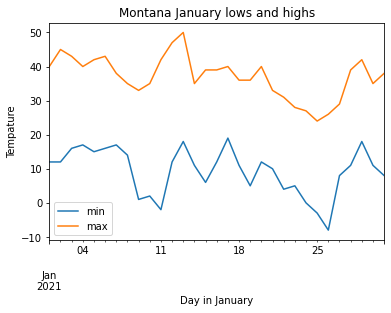

In [93]:
MinMaxMT.plot("Date")
plt.title("Montana January lows and highs")
plt.ylabel("Tempature")
plt.xlabel("Day in January")
plt.show()


### 3. (40 Points) Choosing the Best Visualization
There are 4 questions below. Using the Netflix dataset (neflix.csv), please answer the questions with a visualization and explain why you chose the chart type you did. (Make sure to include axis labels and plot titles)

In [7]:
### Data 
netflix = pd.read_csv('netflix.csv')

0    9.0
1    8.6
2    8.5
3    8.4
4    8.4
Name: IMDB Score, dtype: float64

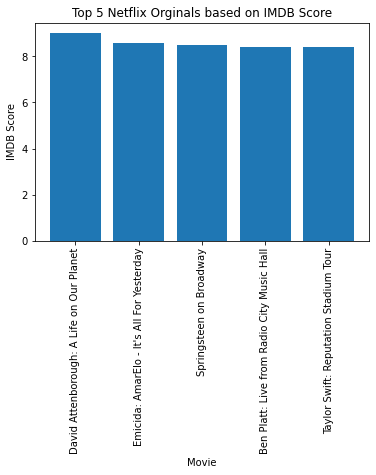

In [10]:
#1. What are the top 5 Netflix Orginals based on IMDB Score?
#I chose a bar graph because it shows the IMDB scores the movie receives and one can visually see the top and bottom 5 netflix originals
netflix.sort_values('IMDB Score')
top5 = netflix.head(5)
top5['IMDB Score']
x = top5['Title']
y = top5['IMDB Score']
plt.bar(x,y)
plt.xlabel("Movie")
plt.ylabel("IMDB Score")
plt.title("Top 5 Netflix Orginals based on IMDB Score")
plt.xticks(rotation = 90)
plt.show()

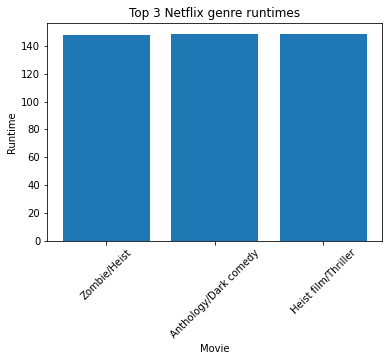

In [50]:
#2. Which 3 Genre's have the highest average runtimes? 
# Again I chose a bar graph to represent the 3 genre's with the highest average run time. I feel bar graphs do a great job
#of distinguishing features and showing differences between values.

netgenre = pd.unique(netflix['Genre'])

genredf = netflix.groupby(['Genre'], as_index=False).mean()
genredf = genredf.sort_values(by="Runtime")
genredf = genredf.tail(3)
genredf[['Genre']]

x = genredf['Genre']
y = genredf['Runtime']

plt.bar(x,y)
plt.xlabel("Movie")
plt.ylabel("Runtime")
plt.title("Top 3 Netflix genre runtimes")
plt.xticks(rotation = 45)
plt.show()


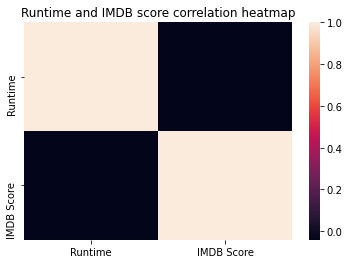

             Runtime  IMDB Score
Runtime     1.000000   -0.040896
IMDB Score -0.040896    1.000000


In [65]:
#3. Do runtime & IMDB Score correlate to each other? (Please clarify your plot with an explanation of what you see.)
#I used a heat map plot to determine correlation. The heat map shows correlation between the two value. As can be seen,
# by the labeled axises the top left and bottom right boxes are correlating the variable to itself. These are correlations of
# 1, which means they are completely correlated. The other boxes are a dark color suggesting the two variables are not correlated.

cor = netflix.corr()
seaborn.heatmap(cor)
plt.title("Runtime and IMDB score correlation heatmap")
plt.show()
print(netflix.corr())



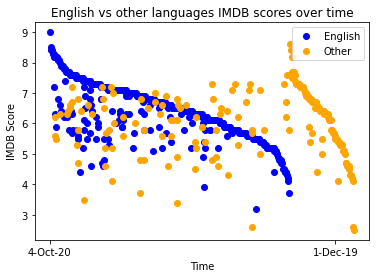

In [122]:
import matplotlib.dates as mdate

english_or_other = []
other = []

for lang in netflix['Language']:
    if lang == 'English':
        english_or_other.append(1)
    else:
        english_or_other.append(0)
        
netflix['english_or_other'] = english_or_other

English = netflix.loc[netflix['english_or_other'] == 1]
Other = netflix.loc[netflix['english_or_other'] == 0]

plt.plot_date(English['Premiere'], English["IMDB Score"], label='English', color= 'blue')
plt.plot_date(Other['Premiere'], Other["IMDB Score"], label='Other', color='orange')
plt.legend()
plt.xlabel("Time")
plt.ylabel("IMDB Score")
plt.title("English vs other languages IMDB scores over time")
plt.gca().xaxis.set_major_locator(mdate.YearLocator())

plt.show()

### 4. (20 Points) Exploratory Data Analyis
Using the mpg dataset do the following: 

    * (5 points) Explore the relationship between all the numerical values in the dataset in one plot
    * (10 points) Out of weight, horsepower, & cylinders, which variable appears to have the most influence on high MPG; use subplots to plot the relationship between the variables (at least 2 plots & there's not necessarily a correct answer here, more interested in logic behind it) 
    * (5 points) Create one chart depicting a relationship between a numerical & categorial variable you find interesting 

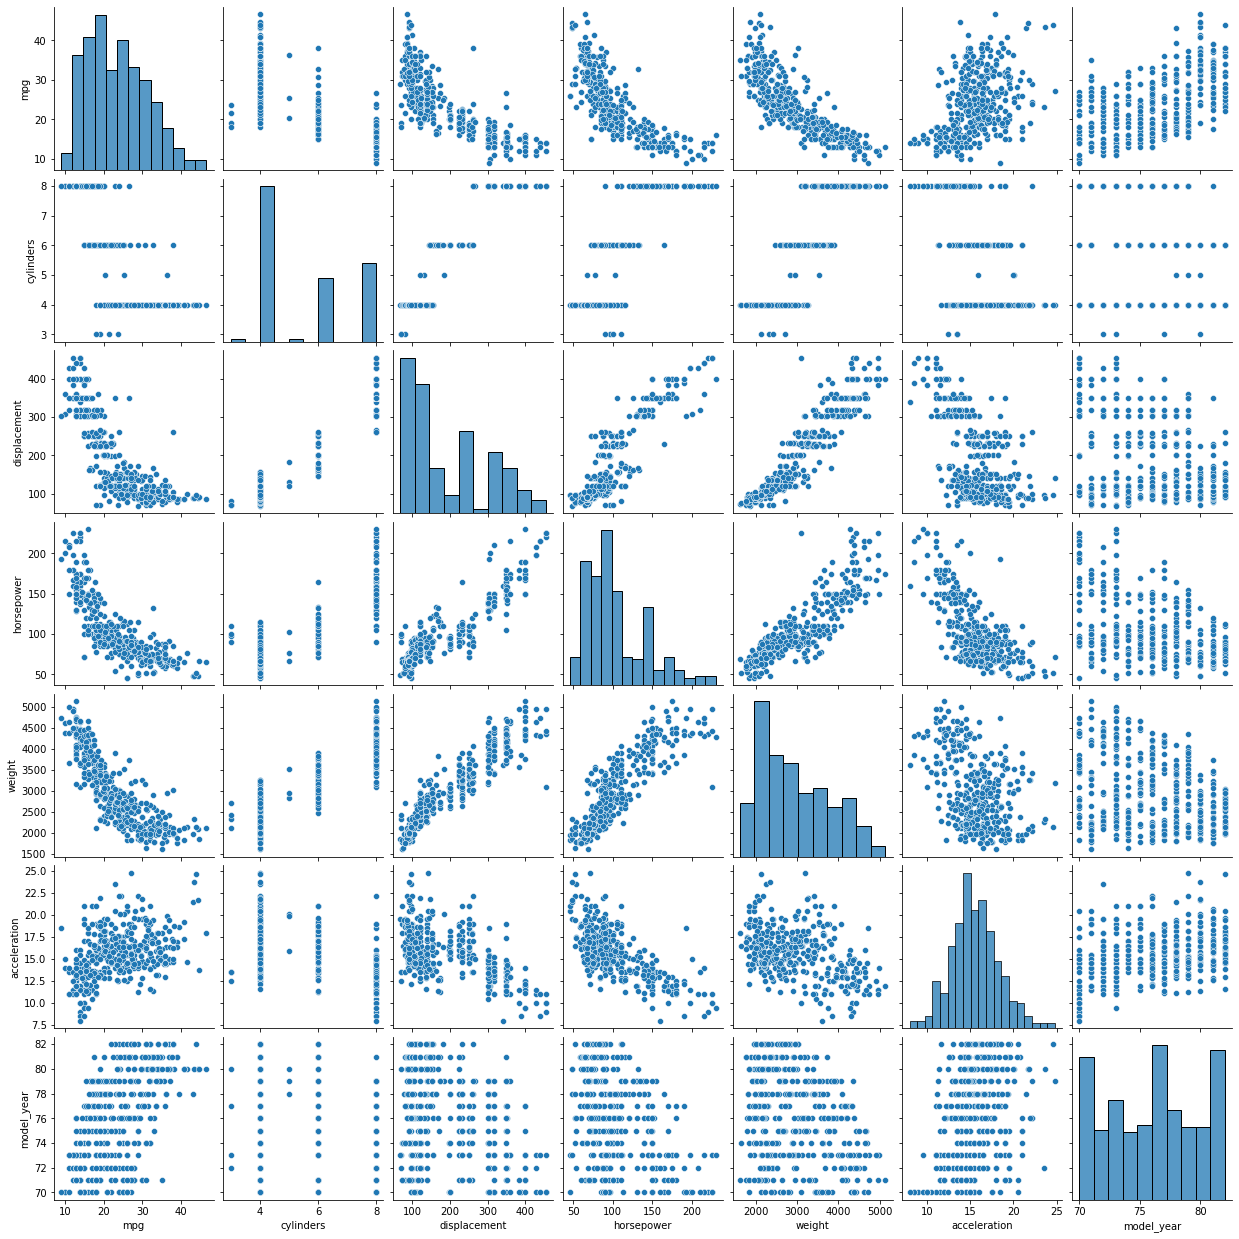

In [129]:
#1

import seaborn as sns
mpg = sns.load_dataset('mpg')
nummpg = mpg[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]
sns.pairplot(nummpg)


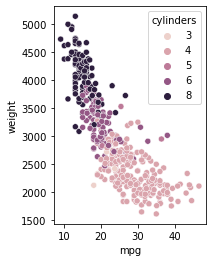

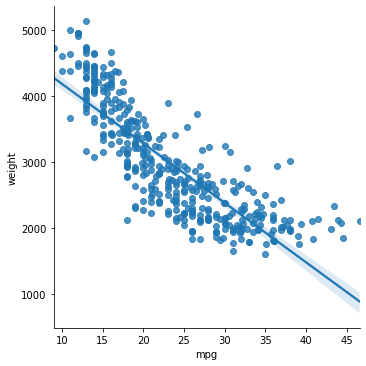

In [148]:
#2
#Weight, horsepower, & cylinders all have a negative correlation to MPG. Weight has the
#strongest negative correlation. However, horsepower and the ammount of cylinders are also great indicators.
#I decided to use a scatter plot with a hue. I felt like this helps show the main arguement 
#that as weight increases mpg decreases. It also helps show the relationship between cylinders, weight and MPG.
#The other plot used was a scatter plot with a line of best fit. Although this doesn't appear to be a sctrictly
#linear correlation, I feel this plot helps show the slope of the correlation and give the viewer an idea of what
#the correlation coefficient may be.

nummpg.corr()
cars = mpg[['mpg', 'cylinders', 'horsepower', 'weight']]
plt.subplot(1,2,1)
sns.scatterplot(x="mpg", y="weight", hue='cylinders', data=cars)
sns.lmplot(x="mpg", y="weight", data=cars)
plt.show()

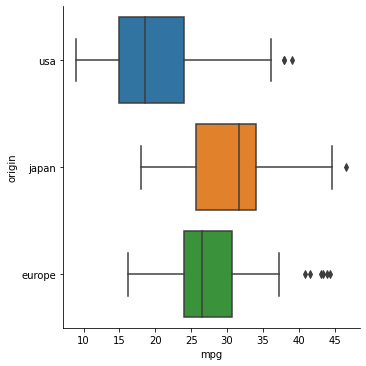

In [151]:
#One of my favorite graphs is a box plot so for the last question I wanted to see how I could create a box plot.
#This plot helps show the differences in MPG and the country of origin.

sns.catplot(x="mpg", y="origin", kind="box", data=mpg)